# Predicting Bike Rentals

Use Machine Learning Algorithms to predict bike rental with the given dataset of Washington DC. With the help of the following algorthms. 

1. Decision Trees 
2. Random Forest 


In [1]:
import pandas as pd 
import numpy as np 
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


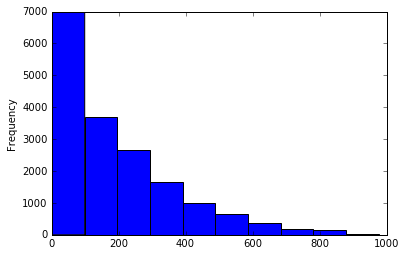

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
bike_rentals["cnt"].plot.hist()

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64


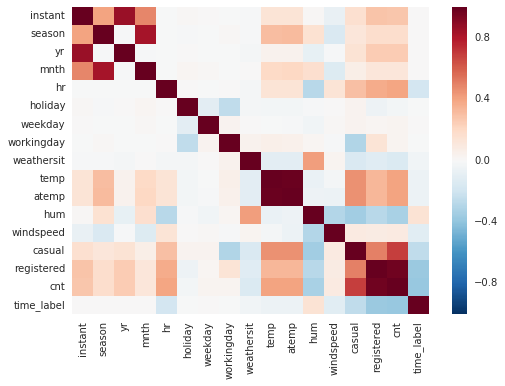

In [70]:
import seaborn as sns
corr_df = bike_rentals.corr()
ax = sns.heatmap(corr_df)
print(corr_df["cnt"])

The plot explains the correlation between features and helps us select features and thus designing our model.

In [71]:
def assign_label(hour):
    if hour<6:
        return 4
    elif hour<12:
        return 1
    elif hour<18:
        return 2
    elif hour<24:
        return 3
    else:
        print("Error")
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals["time_label"].value_counts(dropna = True) 

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

Easier to train our model and test our model by changing it to numbers.

In [5]:
train_index = int(len(bike_rentals)*0.8)
train = bike_rentals.sample(frac=.8)
train

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
7009,7010,2011-10-24,4,0,10,16,0,1,1,1,0.54,0.5152,0.64,0.1940,68,242,310,2
7205,7206,2011-11-01,4,0,11,20,0,2,1,1,0.40,0.4091,0.71,0.0000,18,191,209,3
1126,1127,2011-02-19,1,0,2,16,0,6,0,1,0.44,0.4394,0.16,0.6418,39,81,120,2
15965,15966,2012-11-02,4,1,11,22,0,5,1,1,0.36,0.3333,0.46,0.2537,14,135,149,3
10620,10621,2012-03-23,2,1,3,15,0,5,1,2,0.72,0.6515,0.42,0.1343,191,281,472,2
11937,11938,2012-05-17,2,1,5,14,0,4,1,1,0.64,0.6212,0.38,0.1940,68,202,270,2
2707,2708,2011-04-27,2,0,4,17,0,3,1,3,0.66,0.6061,0.83,0.3881,63,458,521,2
13153,13154,2012-07-07,3,1,7,6,0,6,0,1,0.74,0.7121,0.74,0.1045,4,27,31,1
6521,6522,2011-10-04,4,0,10,7,0,2,1,1,0.42,0.4242,0.82,0.2836,11,298,309,1
2344,2345,2011-04-12,2,0,4,14,0,2,1,2,0.50,0.4848,0.82,0.2836,16,28,44,2


In [6]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
15,16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110,2
22,23,2011-01-01,1,0,1,22,0,6,0,2,0.40,0.4091,0.94,0.2239,11,17,28,3
30,31,2011-01-02,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1,1
31,32,2011-01-02,1,0,1,8,0,0,0,3,0.40,0.4091,0.71,0.2239,0,8,8,1
39,40,2011-01-02,1,0,1,16,0,0,0,3,0.34,0.3333,0.71,0.1642,9,67,76,2


In [7]:
columns_to_ignore = ["cnt","casual","dteday","registered"]
columns = [ ]
for i in bike_rentals.columns:
    if i not in columns_to_ignore:
        columns.append(i)
columns


['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(train[columns],train["cnt"])
train_predictions = lr.predict(train[columns])
train_mse = mean_squared_error(train["cnt"],train_predictions)
print("Train MSE is",train_mse)

test_predictions = lr.predict(test[columns])
test_mse = mean_squared_error(test["cnt"],test_predictions)
print("Test MSE is",test_mse)

Train MSE is 17522.667471616987
Test MSE is 17303.660093988598


We have compared the predicted values generated by the test dataset and arrived at a Mean Squared Error which is **high** when we used a Linear Model.
The train and test errors aren't too far apart, showing us that our model isn't too biased or overfit.

**DECISION TREE**

Now we will build a Decision tree model, this will predict outcomes much more reliably than linear regression models, because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. 

In [9]:
from sklearn.tree import DecisionTreeRegressor
dec_model_1 = DecisionTreeRegressor(random_state = 1)
dec_model_1.fit(train[columns],train["cnt"])
predictions_model_1 = dec_model_1.predict(test[columns])
model1_mse = mean_squared_error(test["cnt"],predictions_model_1)
model1_mse

2998.211737629459

The Mean Squared error is significantly reduced, now let us experiment by using different values for *min_samples_leaf* and *max_depth*.




In [10]:
import collections
mse_values = {}
for i in range(1,42,3):
    dec_model = DecisionTreeRegressor(random_state = 1,min_samples_leaf = i)
    dec_model.fit(train[columns],train["cnt"])
    predictions_model = dec_model.predict(test[columns])
    model_mse = mean_squared_error(test["cnt"],predictions_model)
    mse_values[i] = model_mse

sort_vals = collections.OrderedDict(sorted(mse_values.items()))
print(sort_vals)

# dec_model_2 = DecisionTreeRegressor(random_state = 1,min_samples_leaf = 40)
# dec_model_2.fit(train[columns],train["cnt"])
# predictions_model_2 = dec_model_2.predict(test[columns])
# model2_mse = mean_squared_error(test["cnt"],predictions_model_2)
# model2_mse

OrderedDict([(1, 2998.211737629459), (4, 2753.4402868568786), (7, 2597.0343035974183), (10, 2643.293551718933), (13, 2838.915613911672), (16, 2818.9216537981374), (19, 2941.0225290861604), (22, 3050.5234225357112), (25, 3211.6819710968175), (28, 3254.8465109896674), (31, 3258.2441118435236), (34, 3380.349895264245), (37, 3544.5181451624558), (40, 3668.90723249677)])


We achieve the minimum MSE value when *min_samples_leaf* is between  4 and 10. Now let us see if we can reduce the MSE value any further by using *max_depth*.

For this we will use min_samples_leaf=7

In [11]:
mse_trees = { }
for i in range(4,30,2):
    tree_model = DecisionTreeRegressor(random_state = 1,min_samples_leaf = 7, max_depth = i)
    tree_model.fit(train[columns],train["cnt"])
    predictions_model_tree = tree_model.predict(test[columns])
    model_mse_tree = mean_squared_error(test["cnt"],predictions_model_tree)
    mse_trees[i] =     model_mse_tree
    
sort_vals_tree = collections.OrderedDict(sorted(mse_trees.items()))
print(sort_vals_tree)

OrderedDict([(4, 13418.989140961401), (6, 10335.277934586627), (8, 4774.7691362084415), (10, 3435.5616646788767), (12, 2796.9170082969736), (14, 2641.131377834191), (16, 2595.425267473125), (18, 2602.3295399446906), (20, 2600.7552005298853), (22, 2596.7774125419164), (24, 2597.0343035974183), (26, 2597.0343035974183), (28, 2597.0343035974183)])


The lowest MSE value we reach when changing max_Depth is 2459 and the error remains more or less constant aftr max_depth = 24.
The ideal model where we got the lowest MSE is when we have min_samples_leaf = 7 and max_depth = 18. 

Now let us use Random Forest Model and see if we achieve a lower MSE value.

**RANDOM FOREST**

You can now apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests are prone to overfitting, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [12]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state = 1)
clf.fit(train[columns],train["cnt"])
predictions_forest = clf.predict(test[columns])
forest_mse = mean_squared_error(test["cnt"],predictions_forest)
forest_mse

1818.4411162255467

We achived a lower MSE value with Random Forest model, let us try to lower the error by tweaking *n_estimators* and *min_samples_leaf*

In [13]:
dic = { }
for i in range(1,11):
    clf_1 = RandomForestRegressor(random_state = 1,min_samples_leaf = i)
    clf_1.fit(train[columns],train["cnt"])
    predictions_forest_1 = clf_1.predict(test[columns])
    forest_mse_1 = mean_squared_error(test["cnt"],predictions_forest_1)
    dic[i] = forest_mse_1
print(dic)

{1: 1818.4411162255467, 2: 1801.8724153025512, 3: 1832.5704192735761, 4: 1858.3742733254446, 5: 1898.946714057019, 6: 1952.4319194164668, 7: 1987.1297070162059, 8: 2043.7532726653742, 9: 2102.7424930425695, 10: 2153.086585090169}


Looks like *min_samples_leaf* yields the lowest error with value 1, let us add n_estimators to try and reduce the error. 


In [19]:
clf_2 = RandomForestRegressor(random_state = 1,min_samples_leaf = 3, n_estimators = 110)
clf_2.fit(train[columns],train["cnt"])
predictions_forest_2 = clf_2.predict(test[columns])
forest_mse_2 = mean_squared_error(test["cnt"],predictions_forest_2)
forest_mse_2

1722.6161290654452

The MSE is clearly lowered using these parameters, this is a model based on all the columns 14 columns. 

Let us look deeper and build a model that is specific to the nature i.e temperature, humidity, windspeed.

In [29]:
new_model_columns = ["temp","hum","windspeed","atemp"]
train[new_model_columns]

,temp,hum,windspeed,atemp
7009,0.54,0.64,0.1940,0.5152
7205,0.40,0.71,0.0000,0.4091
1126,0.44,0.16,0.6418,0.4394
15965,0.36,0.46,0.2537,0.3333
10620,0.72,0.42,0.1343,0.6515
11937,0.64,0.38,0.1940,0.6212
2707,0.66,0.83,0.3881,0.6061
13153,0.74,0.74,0.1045,0.7121
6521,0.42,0.82,0.2836,0.4242
2344,0.50,0.82,0.2836,0.4848


In [65]:
target_cols = ["casual","registered","cnt"]
temp_dic = { }
for col in target_cols:
    temp_model = LinearRegression()
    temp_model.fit(train[new_model_columns],train[col])
    pred = temp_model.predict(test[new_model_columns])
    temp_mse = mean_squared_error(test[col],pred)
    temp_dic[col] = temp_mse
print(temp_dic)

{'registered': 18978.967882627614, 'casual': 1598.2566844592666, 'cnt': 24671.321644822125}


In [66]:
temp_dic_1 = { }
for col in target_cols:
    temp_model_1 = DecisionTreeRegressor(random_state = 1,min_samples_leaf = 40,max_depth = 10)
    temp_model_1.fit(train[new_model_columns],train[col])
    pred_1 = temp_model_1.predict(test[new_model_columns])
    temp_mse_1 = mean_squared_error(test[col],pred_1)
    temp_dic_1[col] = temp_mse_1
print(temp_dic_1)

{'registered': 18827.432850953606, 'casual': 1492.8714697018925, 'cnt': 23955.701290116467}


In [68]:
temp_dic_2 = { }
for col in target_cols:
    temp_model_2 = RandomForestRegressor(random_state = 1,min_samples_leaf = 20, n_estimators = 200)
    temp_model_2.fit(train[new_model_columns],train[col])
    pred_2 = temp_model_2.predict(test[new_model_columns])
    temp_mse_2 = mean_squared_error(test[col],pred_2)
    temp_dic_2[col] = temp_mse_2
print(temp_dic_2)

{'registered': 18421.961815439096, 'casual': 1465.2095941561938, 'cnt': 23449.04657115184}


# Conclusion

1. Very evident that Random Trees, Decision Trees are going to provide us with a more accurate model based off the error metric[Mean Square Error]. We were able to reduce the error by 10 times between Linear and Decision Tree/Random Forest. 

2. MSE arranged from highest to lowest 
     
     Linear>Decision Tree> Random Forest